<a href="https://colab.research.google.com/github/FatmaAMR/Loan-Approval/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

The problem addressed in this project is predicting **loan approval status** based on applicants’ demographic, financial, and employment information


Banks and financial institutions often receive numerous loan applications, and manual processing can be inefficient and prone to errors. By leveraging machine learning techniques, we aim to build a predictive model that can classify loan applications as **approved** or **not approved**, helping institutions make faster and more reliable decisions while reducing risks.


Key challenges include handling **imbalanced datasets**, **categorical encoding**, **feature scaling**, and ensuring that the model generalizes well to unseen data.


![](https://i.pinimg.com/1200x/33/65/94/3365943b903503f016ae632f05ff1116.jpg)



## **Data Understanding, Cleaning, and Preprocessing**

In [ ]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, precision_recall_curve


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
path = '/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv'
data = pd.read_csv(path)
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.shape

(4269, 13)

In [ ]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns:", num_cols, '\n\n\n')
print("Categorical Columns:", cat_cols, '\n\n\n')

Numerical Columns: ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'] 



Categorical Columns: ['education', 'self_employed', 'loan_status'] 





In [ ]:
data.duplicated().sum()

0

In [ ]:
colors = 'Blues'

--- loan_id ---
Q1: 1068.0
Q3: 3202.0
IQR: 2134.0
Lower Bound: -2133.0
Upper Bound: 6403.0
Outlier Count: 0
Outlier %: 0.0
------------------------------


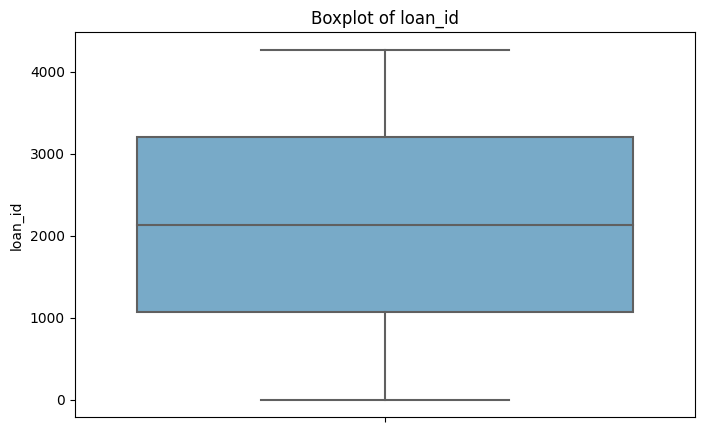

--- no_of_dependents ---
Q1: 1.0
Q3: 4.0
IQR: 3.0
Lower Bound: -3.5
Upper Bound: 8.5
Outlier Count: 0
Outlier %: 0.0
------------------------------


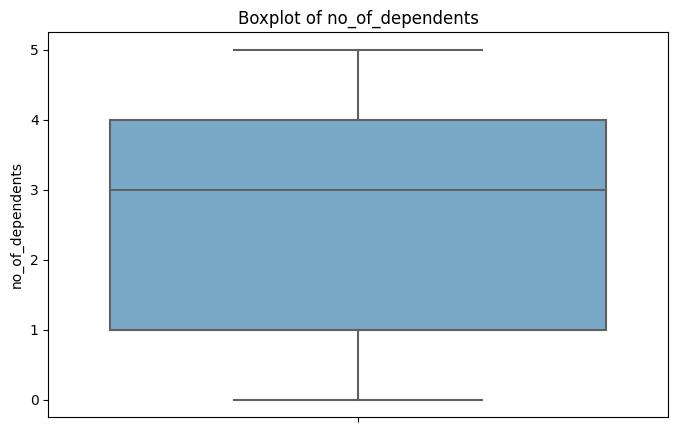

--- income_annum ---
Q1: 2700000.0
Q3: 7500000.0
IQR: 4800000.0
Lower Bound: -4500000.0
Upper Bound: 14700000.0
Outlier Count: 0
Outlier %: 0.0
------------------------------


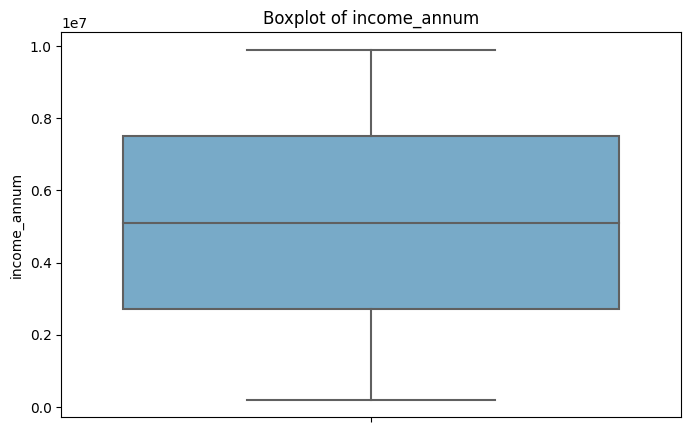

--- loan_amount ---
Q1: 7700000.0
Q3: 21500000.0
IQR: 13800000.0
Lower Bound: -13000000.0
Upper Bound: 42200000.0
Outlier Count: 0
Outlier %: 0.0
------------------------------


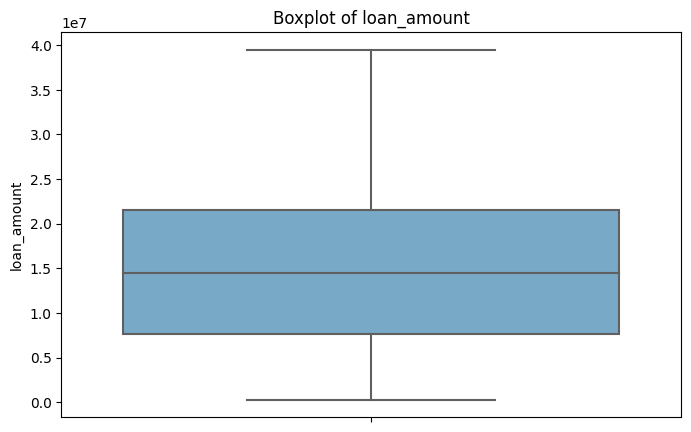

--- loan_term ---
Q1: 6.0
Q3: 16.0
IQR: 10.0
Lower Bound: -9.0
Upper Bound: 31.0
Outlier Count: 0
Outlier %: 0.0
------------------------------


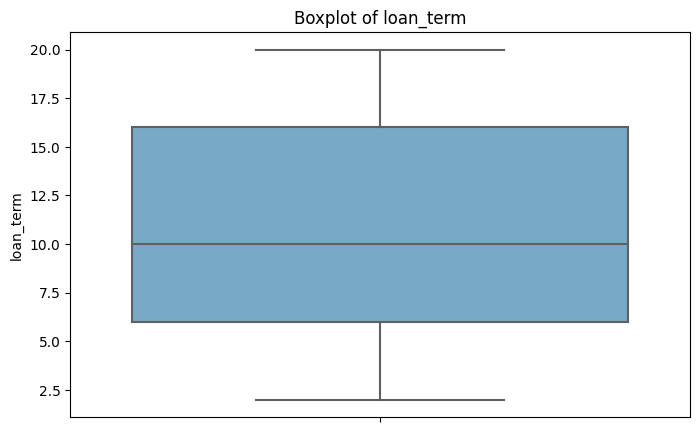

--- cibil_score ---
Q1: 453.0
Q3: 748.0
IQR: 295.0
Lower Bound: 10.5
Upper Bound: 1190.5
Outlier Count: 0
Outlier %: 0.0
------------------------------


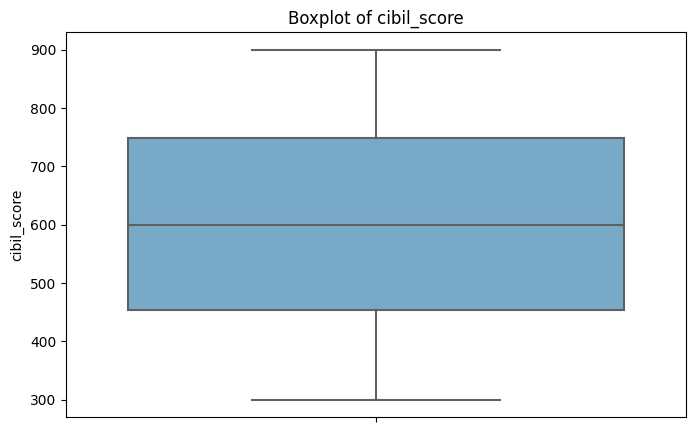

--- residential_assets_value ---
Q1: 2200000.0
Q3: 11300000.0
IQR: 9100000.0
Lower Bound: -11450000.0
Upper Bound: 24950000.0
Outlier Count: 52
Outlier %: 1.2180838603888497
------------------------------


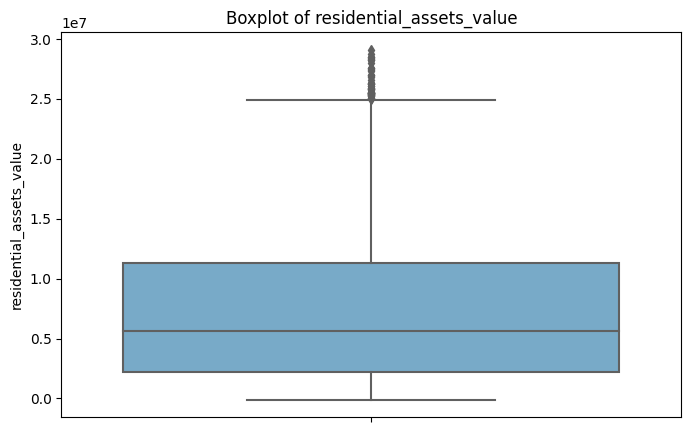

--- commercial_assets_value ---
Q1: 1300000.0
Q3: 7600000.0
IQR: 6300000.0
Lower Bound: -8150000.0
Upper Bound: 17050000.0
Outlier Count: 37
Outlier %: 0.8667135160459125
------------------------------


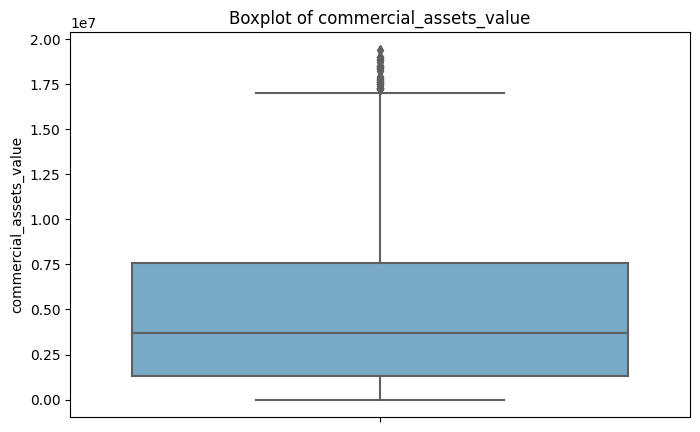

--- luxury_assets_value ---
Q1: 7500000.0
Q3: 21700000.0
IQR: 14200000.0
Lower Bound: -13800000.0
Upper Bound: 43000000.0
Outlier Count: 0
Outlier %: 0.0
------------------------------


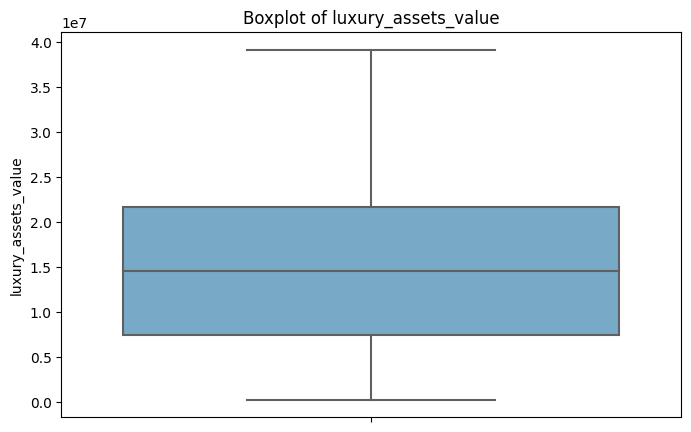

--- bank_asset_value ---
Q1: 2300000.0
Q3: 7100000.0
IQR: 4800000.0
Lower Bound: -4900000.0
Upper Bound: 14300000.0
Outlier Count: 5
Outlier %: 0.11712344811431248
------------------------------


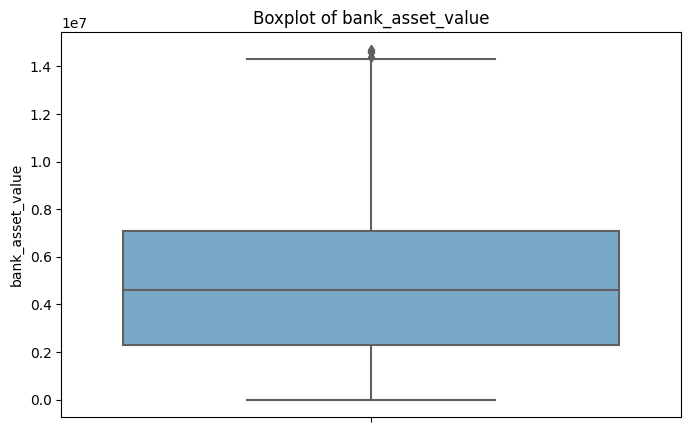

In [ ]:
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in num_cols:
    # Detect outliers for the column
    col_outliers = data[(data[col] < lower_bound[col]) | (data[col] > upper_bound[col])]

    # Summary stats
    summary = {
        'Q1': Q1[col],
        'Q3': Q3[col],
        'IQR': IQR[col],
        'Lower Bound': lower_bound[col],
        'Upper Bound': upper_bound[col],
        'Outlier Count': col_outliers.shape[0],
        'Outlier %': (col_outliers.shape[0] / len(data)) * 100
    }

    print(f"--- {col} ---")
    for k, v in summary.items():
        print(f"{k}: {v}")
    print("-" * 30)

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=col, data=data, palette=colors)
    plt.title(f"Boxplot of {col}")
    plt.show()

residential_assets_value: Removed 52 outliers


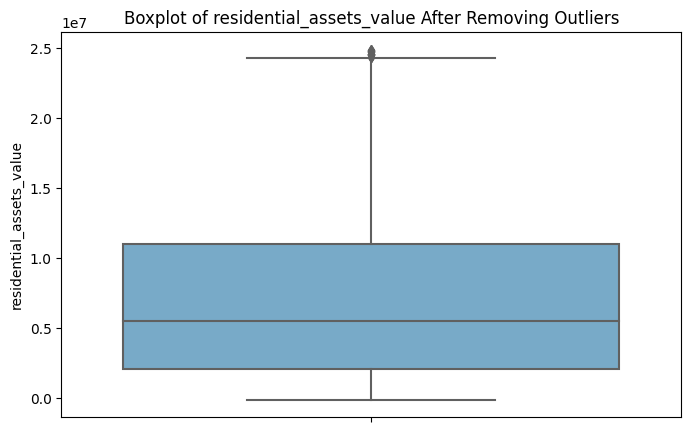

commercial_assets_value: Removed 35 outliers


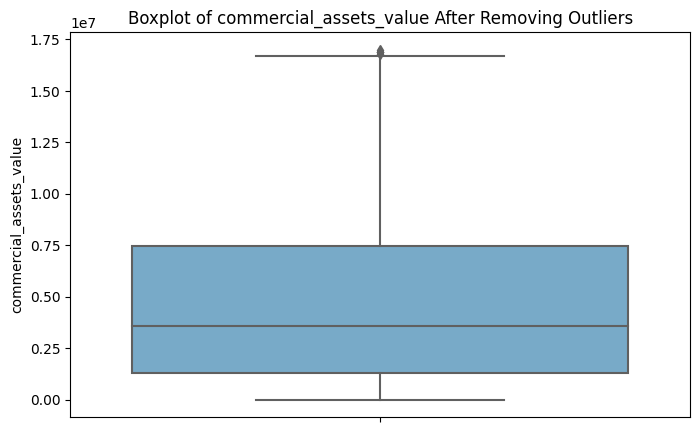

bank_asset_value: Removed 4 outliers


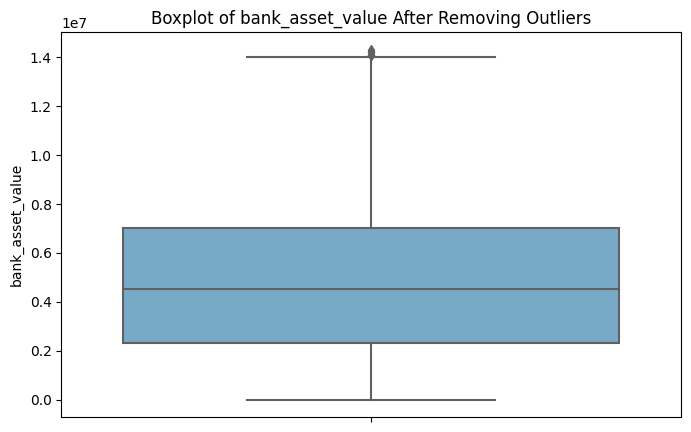

In [ ]:
data_clean = data.copy()

for col in num_cols:
    col_outliers = data[(data[col] < lower_bound[col]) | (data[col] > upper_bound[col])]

    if ((col_outliers.shape[0] / len(data)) * 10) != 0:
        before_rows = data_clean.shape[0]
        data_clean = data_clean[
        (data_clean[col] >= lower_bound[col]) &
        (data_clean[col] <= upper_bound[col])
        ]
        after_rows = data_clean.shape[0]


        print(f"{col}: Removed {before_rows - after_rows} outliers")


        plt.figure(figsize=(8, 5))
        sns.boxplot(y=col, data=data_clean, palette=colors)
        plt.title(f"Boxplot of {col} After Removing Outliers")
        plt.show()

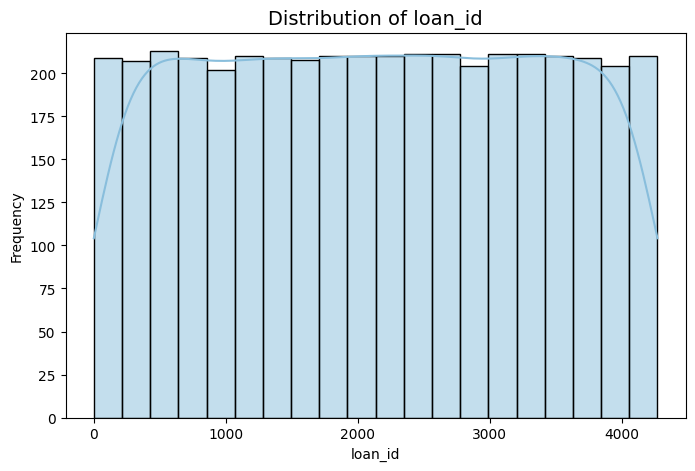

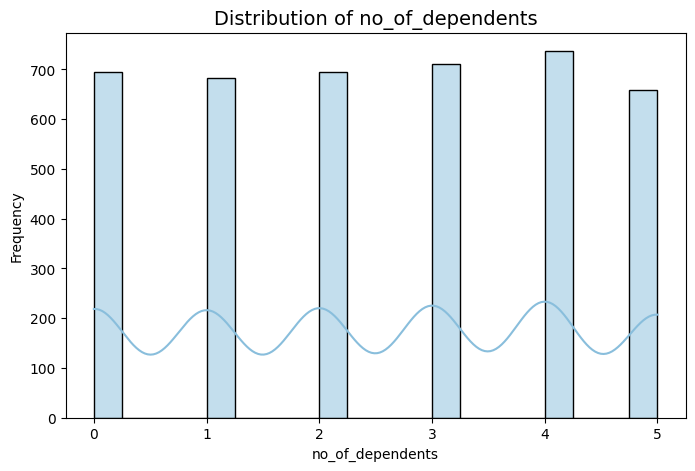

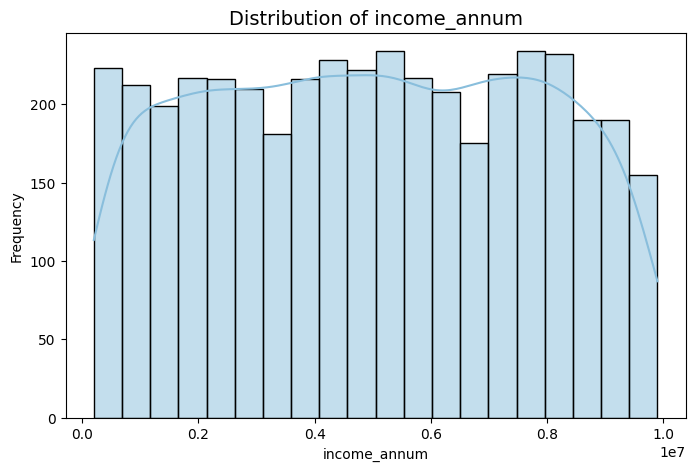

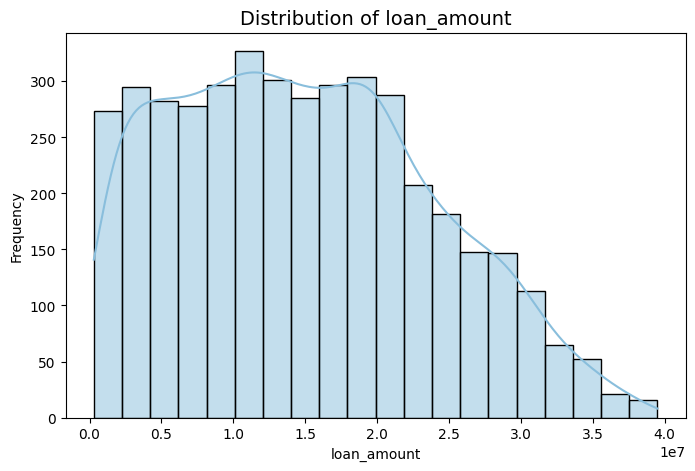

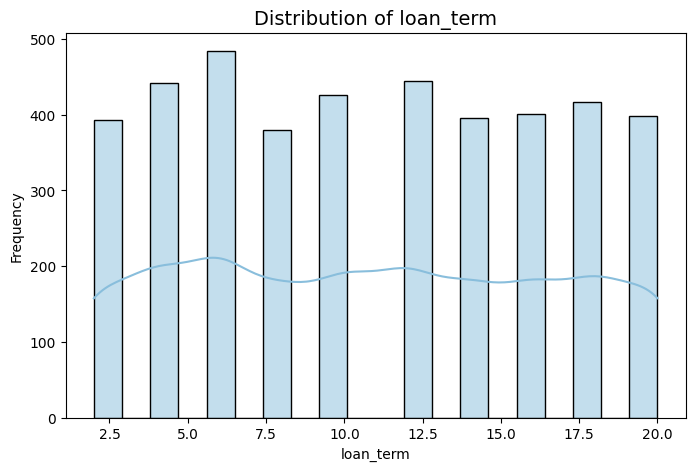

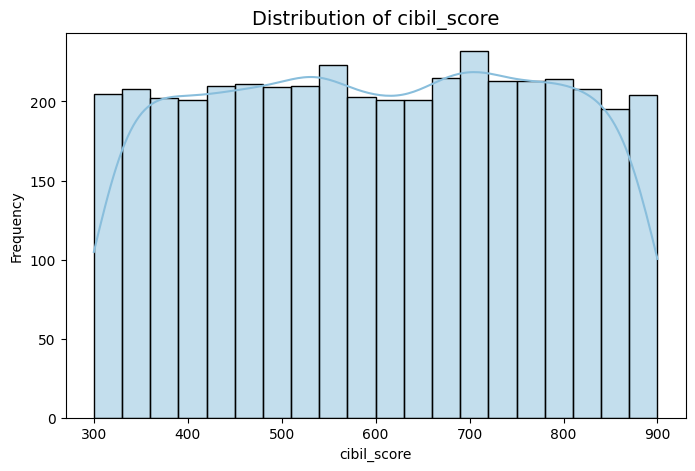

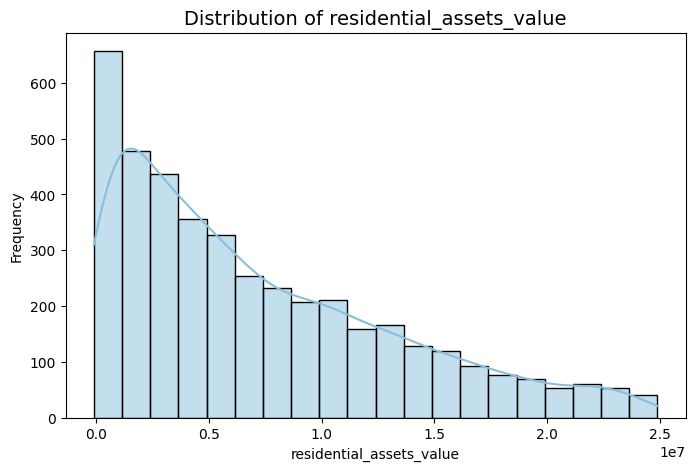

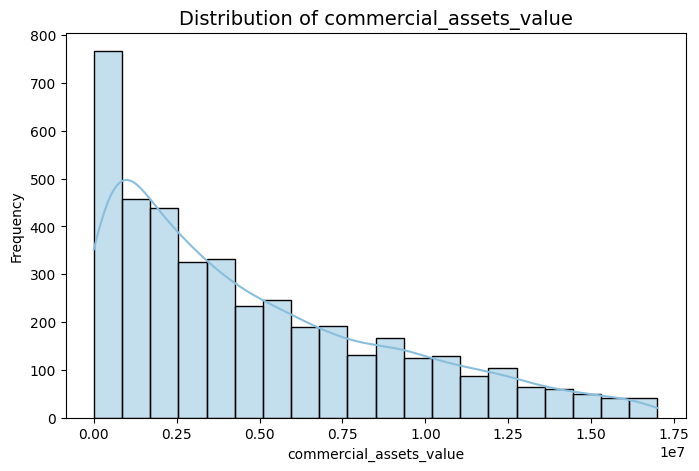

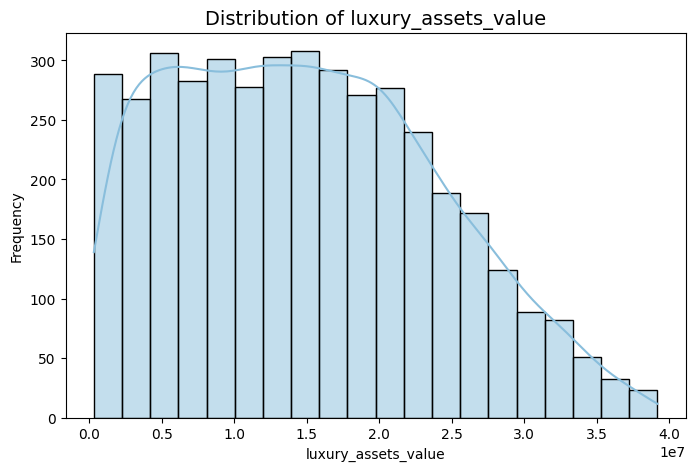

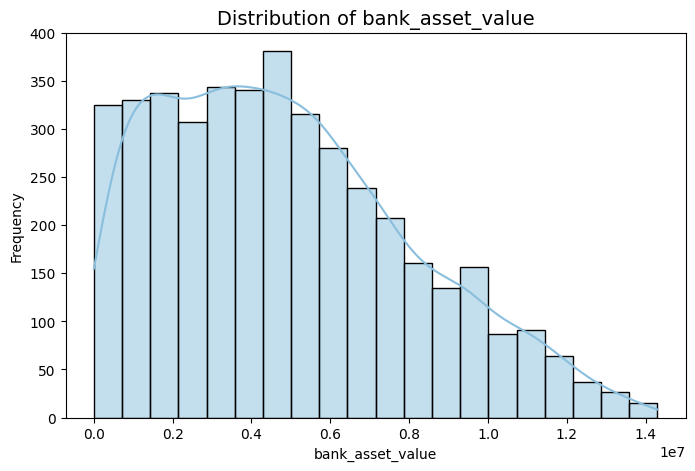

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data_clean[col],
        bins=20,
        kde=True,
        color=sns.color_palette("Blues")[2],
        edgecolor="black"
    )
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

                           loan_id  no_of_dependents  income_annum  \
loan_id                   1.000000          0.005667      0.014776   
no_of_dependents          0.005667          1.000000      0.008009   
income_annum              0.014776          0.008009      1.000000   
loan_amount               0.011093         -0.005450      0.928089   
loan_term                 0.005417         -0.021019      0.008017   
cibil_score               0.015505         -0.010093     -0.020942   
residential_assets_value  0.023324          0.011700      0.625772   
commercial_assets_value   0.022621         -0.002614      0.632890   
luxury_assets_value       0.002118          0.003277      0.930089   
bank_asset_value          0.014538          0.009850      0.850925   

                          loan_amount  loan_term  cibil_score  \
loan_id                      0.011093   0.005417     0.015505   
no_of_dependents            -0.005450  -0.021019    -0.010093   
income_annum                 0.928

<Axes: >

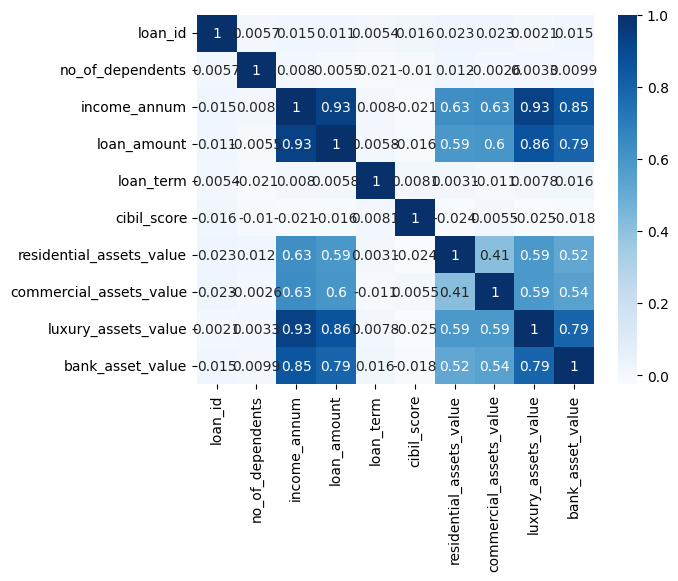

In [ ]:
corr = data_clean[num_cols].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap="Blues")

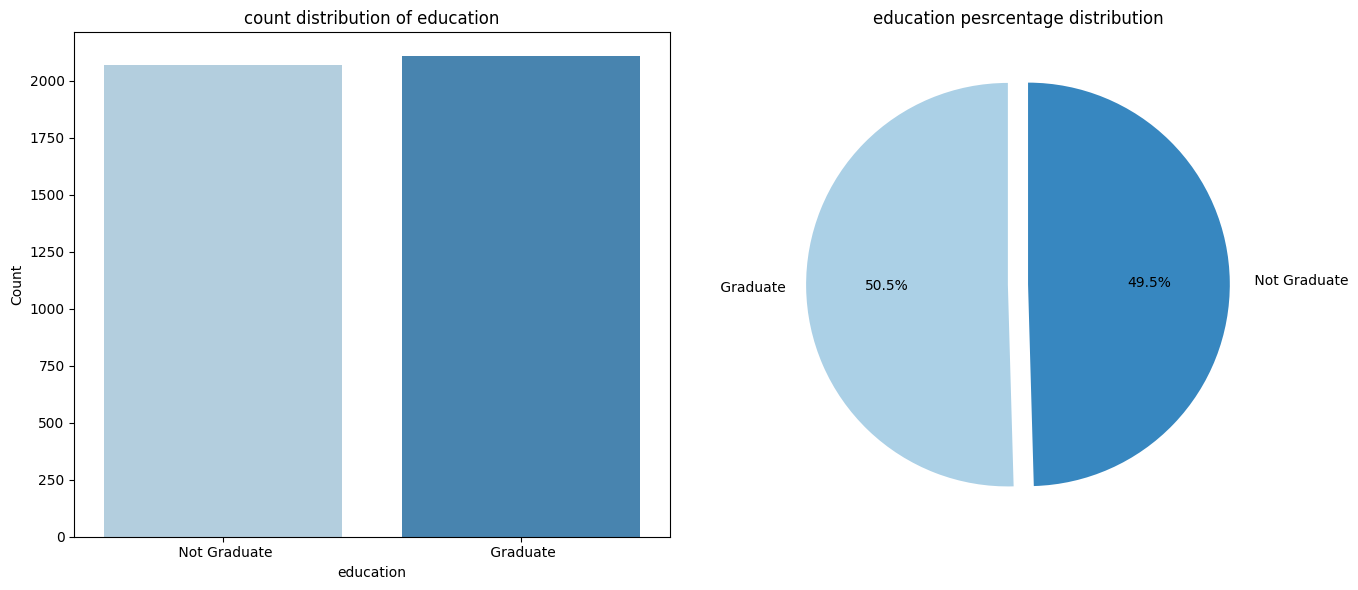

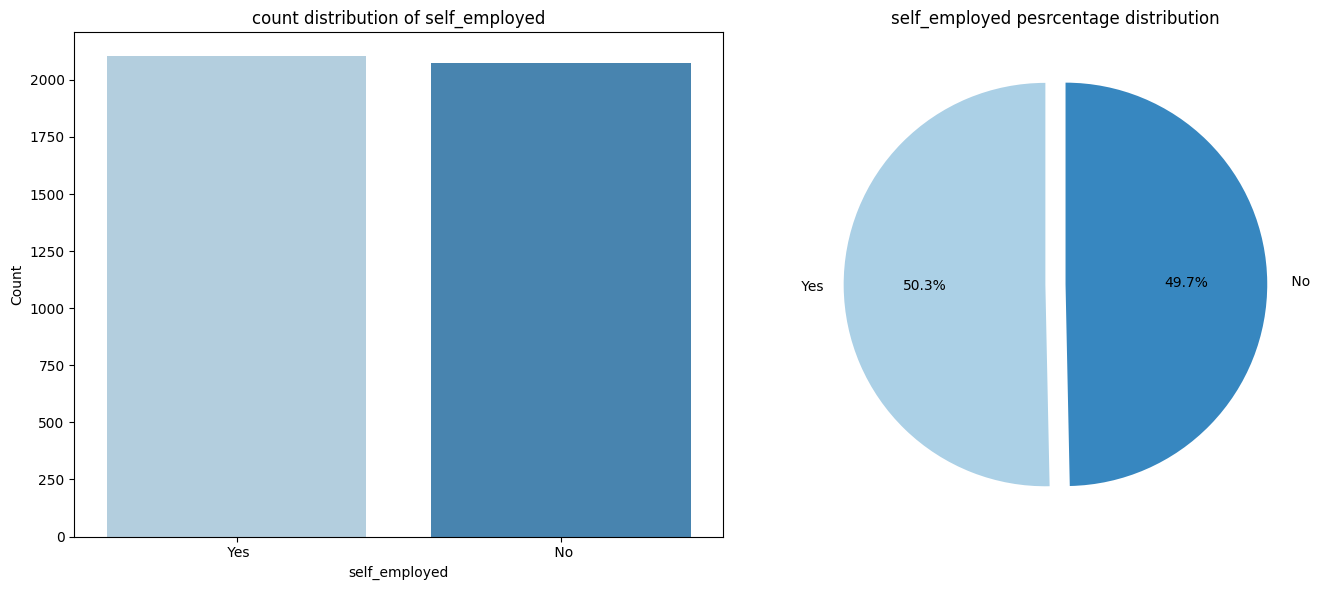

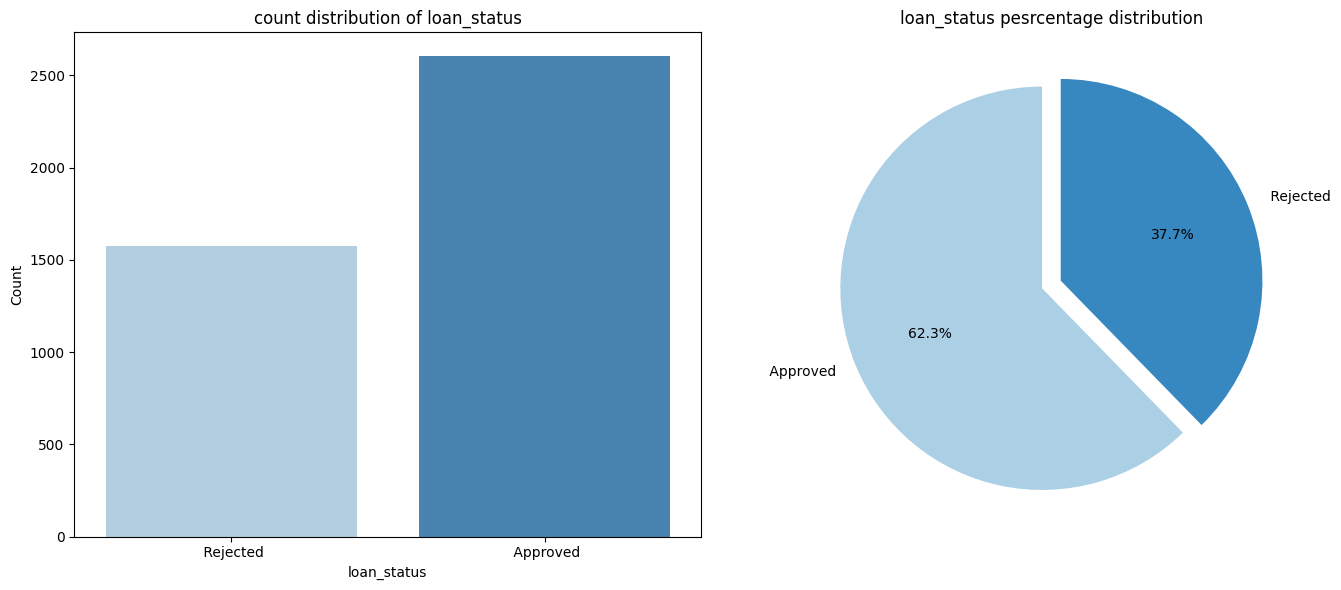

In [ ]:
for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    sns.countplot(x=col, data=data_clean, palette="Blues", ax=axes[0])
    axes[0].set_title(f"count distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    counts = data_clean[col].value_counts()
    labels = counts.index
    values = counts.values

    axes[1].pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Blues", len(labels)),
        explode=[0.05]*len(labels)
    )
    axes[1].set_title(f"{col} pesrcentage distribution")

    plt.tight_layout()
    plt.show()

In [ ]:
print(data_clean['loan_status'].value_counts())

loan_status
Approved    2603
Rejected    1575
Name: count, dtype: int64


In [ ]:
num_cols = data_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = data_clean.select_dtypes(include=["object"]).columns.tolist()
cat_cols.remove('loan_status')

In [ ]:
X = data_clean.drop("loan_status", axis=1)
y = data_clean["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Train featues shape ", X_train.shape)
print("Test featues shape ", X_test.shape)

Train featues shape  (3342, 12)
Test featues shape  (836, 12)


In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

In [ ]:
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_enc, y_train_enc)

In [ ]:
feature_names = preprocessor.get_feature_names_out()

## **Models & Their Evaluation**

### **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train_res, y_train_res)

y_pred_lr = log_reg.predict(X_test_enc)
y_prob_lr = log_reg.predict_proba(X_test_enc)[:, 1]

Logistic Regression Report
              precision    recall  f1-score   support

    Approved       0.95      0.92      0.94       521
    Rejected       0.87      0.92      0.90       315

    accuracy                           0.92       836
   macro avg       0.91      0.92      0.92       836
weighted avg       0.92      0.92      0.92       836



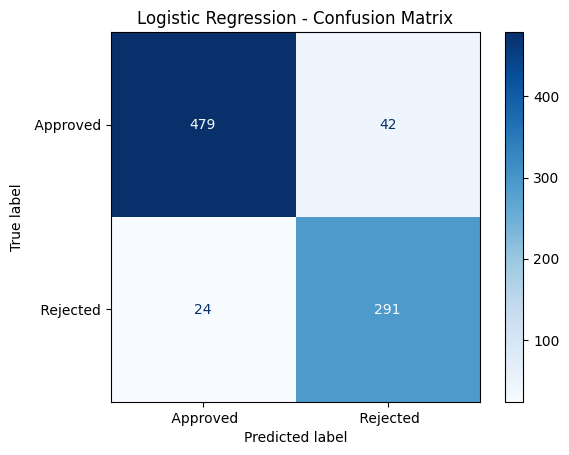

ROC-AUC: 0.9675349602412943


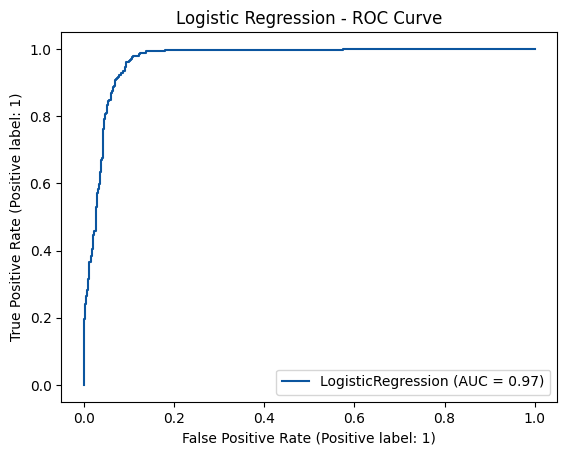

In [ ]:
print("Logistic Regression Report")
print(classification_report(y_test_enc, y_pred_lr, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred_lr)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap="Blues")  # Use Blues for Sky2 approximation
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test_enc, y_prob_lr)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_estimator(log_reg, X_test_enc, y_test_enc, color=sns.color_palette("Blues")[-1])  # Use darkest blue from Blues palette
plt.title("Logistic Regression - ROC Curve")
plt.show()

### **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test_enc)
y_prob_rf = rf.predict_proba(X_test_enc)[:, 1]

Random Forest Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       521
           1       0.93      0.99      0.96       315

    accuracy                           0.97       836
   macro avg       0.96      0.97      0.97       836
weighted avg       0.97      0.97      0.97       836



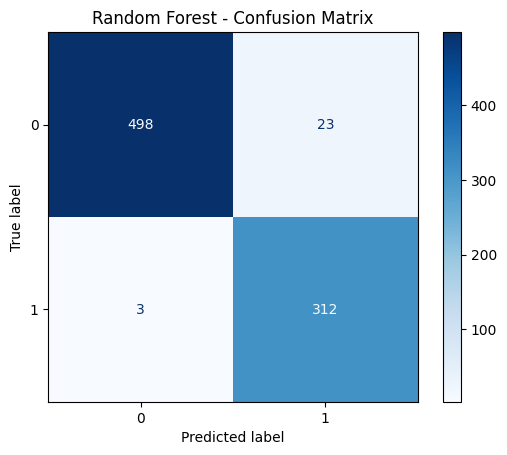

ROC-AUC: 0.9979435152179875


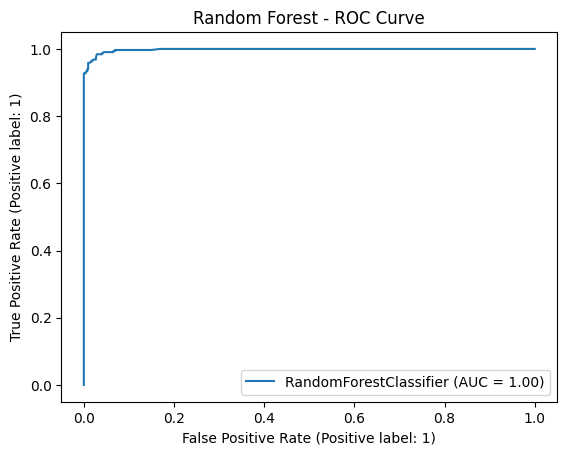

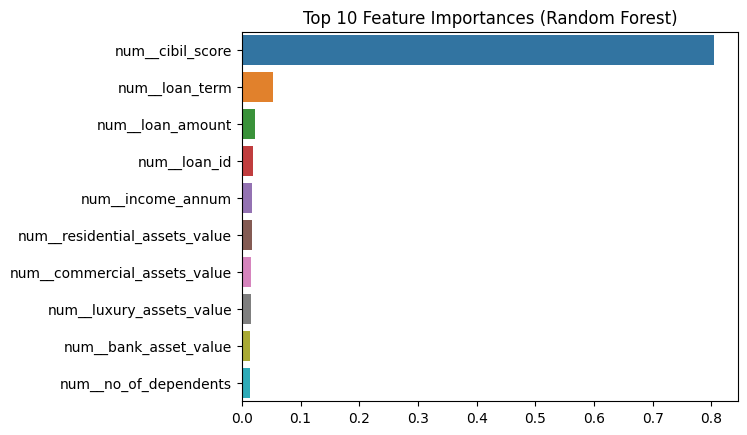

In [ ]:
print("Random Forest Report")
print(classification_report(y_test_enc, y_pred_rf))

cm = confusion_matrix(y_test_enc, y_pred_rf)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test_enc, y_prob_rf)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_estimator(rf, X_test_enc, y_test_enc)
plt.title("Random Forest - ROC Curve")
plt.show()

# Feature Importances
feat_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)  # Use feature_names instead of X.columns
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

### **XGBoost**

In [ ]:
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1])
)
xgb_clf.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_clf.predict(X_test_enc)
y_prob_xgb = xgb_clf.predict_proba(X_test_enc)[:, 1]

XGBoost Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       521
           1       0.96      0.99      0.97       315

    accuracy                           0.98       836
   macro avg       0.98      0.98      0.98       836
weighted avg       0.98      0.98      0.98       836



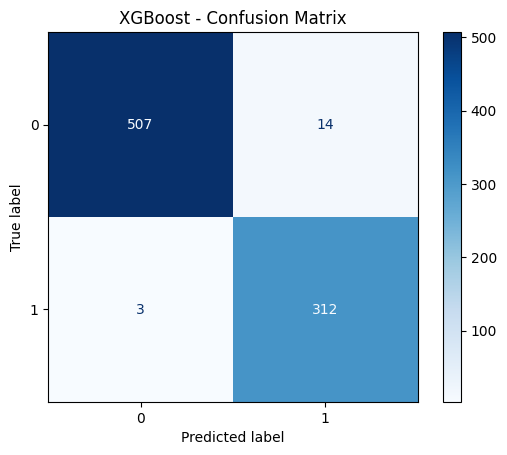

ROC-AUC: 0.9977942296560338


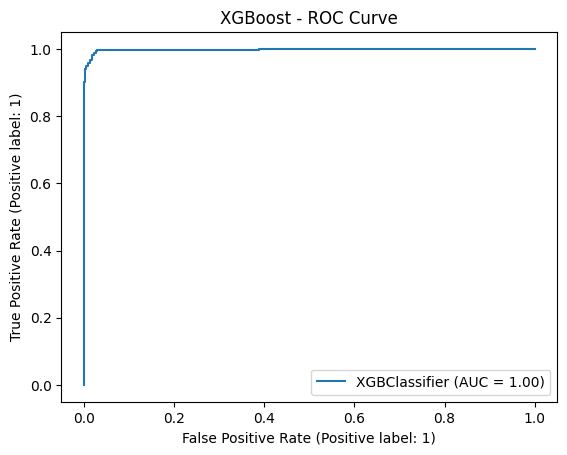

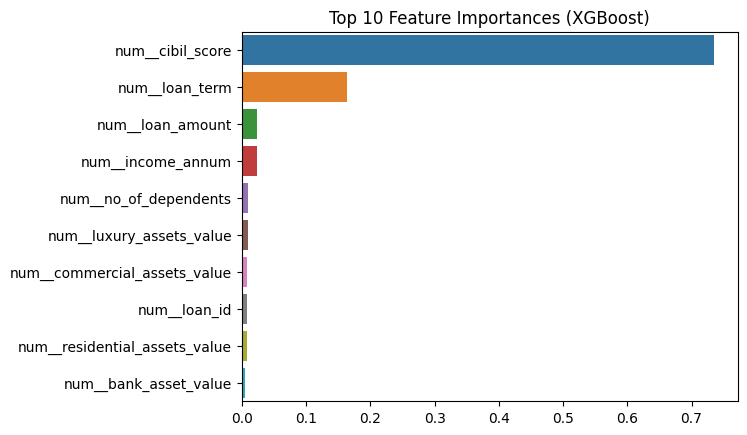

In [ ]:
print("XGBoost Report")
print(classification_report(y_test_enc, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred_xgb)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test_enc, y_prob_xgb)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_estimator(xgb_clf, X_test_enc, y_test_enc)

plt.title("XGBoost - ROC Curve")
plt.show()

# Feature Importances
feat_imp = pd.Series(xgb_clf.feature_importances_, index=preprocessor.get_feature_names_out()).sort_values(ascending=False)

sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()